In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
loc= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Dataset\\Final Output\\Weekly\\'


data= pd.read_excel(loc + 'Data_Moving_avg.xlsx', index_col=False)
data.head()


,Date,Quantity,Amount,Mv_Qty,Mv_Amt,Location,Item
0,2020-01-19,86.101210,429.645000,55.004790,274.473889,FREMONT,CHICKEN XXXXX - O
1,2020-01-26,63.834068,318.532000,63.941686,319.069000,FREMONT,CHICKEN XXXXX - O
2,2020-02-02,45.320977,226.151667,65.085418,324.776222,FREMONT,CHICKEN XXXXX - O
3,2020-02-09,44.333068,221.222000,51.162704,255.301889,FREMONT,CHICKEN XXXXX - O
4,2020-02-16,48.167670,240.356667,45.940572,229.243444,FREMONT,CHICKEN XXXXX - O


In [3]:
data.shape

(2099, 7)

In [4]:
import copy
data_df= copy.deepcopy(data)

In [7]:
# df_new = data_df.loc[data_df['Date'] <= '2022-04-01']

In [6]:
df_new= data_df.copy()

In [72]:
data_df2 = df_new[(df_new['Location']=='FREMONT') & (df_new['Item']== 'FILLET QQQQ')]

In [73]:
data_df2.shape

(150, 7)

In [74]:
data_df2 = data_df2.drop(['Location', 'Item', 'Amount', 'Mv_Amt','Quantity'], axis=1)

In [75]:
# data_df2= data_df2.set_index('Date')

In [76]:
train = data_df2[data_df2['Date']<= '2022-05-01']
test = data_df2[data_df2['Date']>= '2022-05-01']

In [77]:
train= train.set_index('Date')
test= test.set_index('Date')

In [78]:
# a= int(len(data_df2)*0.80)

# train,test = data_df2[:a], data_df2[a:]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [79]:
train.shape, test.shape

((120, 1), (31, 1))

In [80]:
test

,Mv_Qty
Date,
2022-05-01,42.715309
2022-05-08,39.546157
2022-05-15,40.695451
2022-05-22,40.292686
2022-05-29,40.629181
2022-06-05,42.348401
2022-06-12,47.911189
2022-06-19,48.941414
2022-06-26,45.564168


In [81]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past=seq_size = 5  # Number of past days we want to use to predict the future.
n_features = 1 ## number of features. This dataset is univariate so it is 1

#Reformat input data into a shape: (n_samples x timesteps x n_features)

for i in range(n_past, len(train_scaled) - n_future +1):
    trainX.append(train_scaled[i - n_past:i, 0:train.shape[1]])
    trainY.append(train_scaled[i + n_future - 1:i + n_future, 0])

In [82]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (115, 5, 1).
trainY shape == (115, 1).


In [131]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
# model.add(Dropout(0.2))
model.add(LSTM(16, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(LSTM(8, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_37 (LSTM)              (None, 5, 64)             49408     
                                                                 
 dropout_28 (Dropout)        (None, 5, 64)             0         
                                                                 
 lstm_38 (LSTM)              (None, 5, 32)             12416     
                                                                 
 dropout_29 (Dropout)        (None, 5, 32)             0         
                                                                 
 lstm_39 (LSTM)              (None, 5, 16)             3136      
                                                                 
 dropout_30 (Dropout)        (None, 5, 16)            

In [132]:
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
6/6 [==============================] - 18s 454ms/step - loss: 0.3943 - val_loss: 0.2403
Epoch 2/30
6/6 [==============================] - 0s 35ms/step - loss: 0.3622 - val_loss: 0.2103
Epoch 3/30
6/6 [==============================] - 0s 34ms/step - loss: 0.3270 - val_loss: 0.1791
Epoch 4/30
6/6 [==============================] - 0s 33ms/step - loss: 0.2853 - val_loss: 0.1438
Epoch 5/30
6/6 [==============================] - 0s 34ms/step - loss: 0.2626 - val_loss: 0.1070
Epoch 6/30
6/6 [==============================] - 0s 35ms/step - loss: 0.2133 - val_loss: 0.1253
Epoch 7/30
6/6 [==============================] - 0s 35ms/step - loss: 0.2417 - val_loss: 0.1078
Epoch 8/30
6/6 [==============================] - 0s 31ms/step - loss: 0.2249 - val_loss: 0.1058
Epoch 9/30
6/6 [==============================] - 0s 32ms/step - loss: 0.1939 - val_loss: 0.1068
Epoch 10/30
6/6 [==============================] - 0s 34ms/step - loss: 0.1829 - val_loss: 0.1098
Epoch 11/30
6/6 [==========

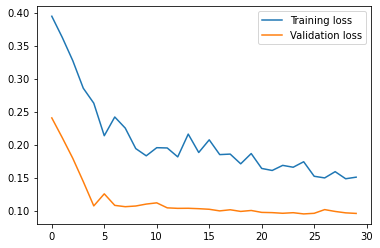

In [133]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [134]:
trainPredict = model.predict(trainX)
train_inverse = scaler.inverse_transform(train_scaled)

4/4 [==============================] - 1s 11ms/step


In [135]:
# trainPredict.shape,train_inverse.shape

In [136]:
# n_past=5
# train_inverse[n_past:].shape

In [137]:
# calculate root mean squared error
import math
from sklearn.metrics import mean_squared_error
n_past=5

MSE_Score = mean_squared_error(train_inverse[n_past:], trainPredict[:,0])
print('Train Score: %.2f MSE' % (MSE_Score))

RMSE_Score = math.sqrt(mean_squared_error(train_inverse[n_past:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (RMSE_Score))

Train Score: 2593.28 MSE
Train Score: 50.92 RMSE


In [138]:
testPredict = model.predict(test)
test_inverse = scaler.inverse_transform(test_scaled)

1/1 [==============================] - 1s 1s/step


In [139]:
MSE_Score = mean_squared_error(test_inverse[:], testPredict[:,0])
print('Test Score: %.2f MSE' % (MSE_Score))

RMSE_Score = math.sqrt(mean_squared_error(test_inverse[:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (RMSE_Score))


Test Score: 1735.83 MSE
Test Score: 41.66 RMSE


In [140]:
# n_past= seq_size= 1          # 1 means-1 week back
# n_days_for_prediction = 36  #let us predict past 12 days


# from pandas.tseries.holiday import USFederalHolidayCalendar
# from pandas.tseries.offsets import CustomBusinessDay
# us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())


# train_dates = pd.to_datetime(data_df2['Date'])
time_series = test.index


In [141]:
# predict_period_dates = pd.date_range(list(time_series)[-1], periods=n_days_for_prediction, freq='W').tolist()
# print(predict_period_dates)

In [142]:
prediction = model.predict(test)

1/1 [==============================] - 0s 49ms/step


In [143]:
prediction.shape

(31, 1)

In [144]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in time_series:
    forecast_dates.append(time_i.date())
    
df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Quantity':rescaled_prediction})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [145]:
#reset index
data_df3= data_df2.reset_index()

original = data_df3[['Date', 'Mv_Qty']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-01-05']

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_2956\2158661631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramshankar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


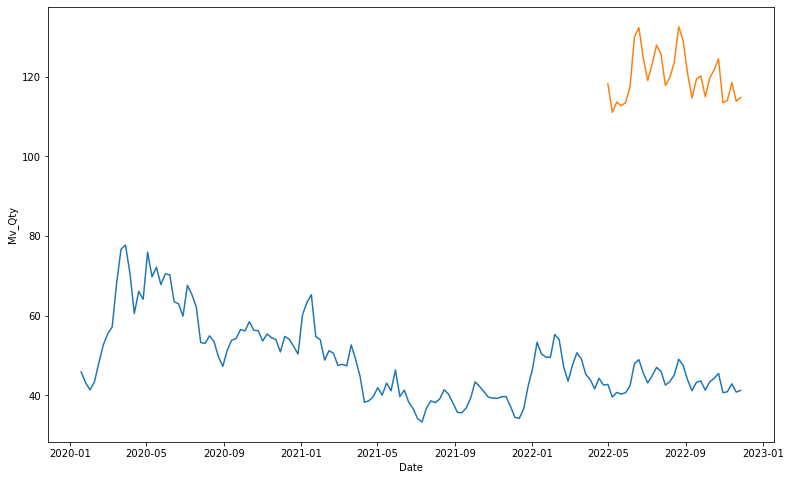

In [146]:
plt.figure(figsize=(13,8)) 
lineplt= sns.lineplot(original['Date'], original['Mv_Qty'])
sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
# lineplt.set(title = 'SAN FRANCISCO--> BEEF OOOO - GT')
plt.show()

### All in one 

In [62]:
df_new = df_new.loc[df_new['Date'] <= '2022-04-01']

In [63]:
df_new.tail()

,Date,Quantity,Amount,Mv_Qty,Mv_Amt,Location,Item
2059,2022-02-27,107.244448,106.172000,110.342874,109.239444,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2060,2022-03-06,93.272733,92.340000,94.878907,93.930111,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2061,2022-03-13,112.682822,111.556000,104.400001,103.356000,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2062,2022-03-20,122.062285,120.841667,109.339280,108.245889,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2063,2022-03-27,102.385522,101.361667,112.376876,111.253111,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [64]:
for i in df_new['Location'].unique():
    df= df_new[df_new['Location']==i]
    for j in df['Item'].unique():
        item_data= df[df["Item"]==j]

        item_data= item_data.drop(['Location', 'Item', 'Amount', 'Quantity', 'Mv_Amt'], axis=1)
        train_dates = pd.to_datetime(item_data['Date'])  #collecting date 
        item_data = item_data.set_index('Date')
#         print(item_data)
        
        #Modelling 
        
        #Splitting 
        a= int(len(item_data)*0.75)
        train,test = item_data[:a], item_data[a:]
        
        #COnverting into same scale 
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        scaler.fit(train) 
        
        #Transforming train and test 
        train_scaled = scaler.transform(train)
        test_scaled = scaler.transform(test)
        
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []

        n_future = 1   # Number of days we want to look into the future based on the past days.
        n_past=seq_size = 5  # Number of past days we want to use to predict the future.
        n_features = 1 ## number of features. This dataset is univariate so it is 1

        #Reformat input data into a shape: (n_samples x timesteps x n_features)

        for num in range(n_past, len(train_scaled) - n_future +1):
            trainX.append(train_scaled[num - n_past:num, 0:train.shape[1]])
            trainY.append(train_scaled[num + n_future - 1:num + n_future, 0])
        
        #Converting to Numpy format
        trainX, trainY = np.array(trainX), np.array(trainY)
        
#         print(f'Location: {i} and  Item: {j}')
        
#         print('trainX shape == {}.'.format(trainX.shape))
#         print('trainY shape == {}.'.format(trainY.shape))
        
#         print("\n")
        print(f"LSTM Archtitecture {i}--> {j}")
        
        model = Sequential()
        model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
        model.add(LSTM(64, activation='relu', return_sequences=True))
        model.add(LSTM(32, activation='relu', return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mse')
#         model.summary()
#         print("\n")
        print(f"Model Training: {i}--> {j}")
        history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.2, verbose=1)
        
        #Plotting traning and validation curve 
        print("\n")
        print(f"Plot for: {i}--> {j}")
        title = i+"-->"+j
        
#         ax.set_title(title)
#         plt.plot(history.history['loss'], label='Training loss')
#         plt.plot(history.history['val_loss'], label='Validation loss')
#         ax.set_ylabel('Quantity')
#         ax.set_xlabel('Date')
#         plt.legend()
        
        print("\n")
        
        print(f"Model Forecasting initated: {i}--> {j}")

        n_past= seq_size= 1        #Number of past days we want to use to predict the future.
        n_days_for_prediction = 36     #let us predict past 12 days
        
        time_series = test.index  #Get dates for test data
        
        #Creating date time periods for next 90 days 
        predict_period_dates = pd.date_range(list(time_series)[-n_past], periods=n_days_for_prediction, freq='W').tolist()
        
        print(f"Model prediction initiated : {i}--> {j}")
        #Make prediction
        prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
        
        ### Inverse transform to before scaling so we get actual numbers
        rescaled_prediction = scaler.inverse_transform(prediction)[:,0]
        
        print(f"Model prediction completed : {i}--> {j}")
        # Convert timestamp to date
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        
        print(f"Storing prediction into DataFrame : {i}--> {j}")
        print("\n")
        
        #Creating/saving prediction into dataframe 
        df_forecast= pd.DataFrame({'Date':np.array(forecast_dates), 'Pred_Quantity':rescaled_prediction})
        df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        
        
        
        #reset index
#         data_df2= item_data.reset_index()
        
#         original = data_df2[['Date', 'Quantity']]
#         original['Date']=pd.to_datetime(original['Date'])
#         original = original.loc[original['Date'] >= '2020-01-02']
        
#         original= original.tail(90)
        
#         print("\n")
        print(f"Plotting prediction with original data : {i}--> {j}")
        
#         plt.figure(figsize=(10,10)) 
#         sns.lineplot(original['Date'], original['Quantity'])
#         sns.lineplot(df_forecast['Date'], df_forecast['Quantity'])
#         print(f"Model Forecasting complted  : {i}--> {j}")
   
        print("\n")
        print(f"Calculating MSE and RMSE : {i}--> {j}")
        #Prediction testing
        trainPredict = model.predict(trainX)
        train_inverse = scaler.inverse_transform(train_scaled)
        
        import math
        from sklearn.metrics import mean_squared_error
        n_past1=5

        MSE_Score = mean_squared_error(train_inverse[n_past1:], trainPredict[:,0])
        print(f'Train Score {i}-{j}: %.2f MSE' % (MSE_Score))

        RMSE_Score = math.sqrt(mean_squared_error(train_inverse[n_past1:], trainPredict[:,0]))
        print(f'Train Score {i}-{j}: %.2f RMSE' % (RMSE_Score))
        
        #Saving Results 
        df_forecast['Location']= i
        df_forecast['Item']=j
        
        print("\n")
        print(f'Writing predicted results of {i} and {j}')
        predction_output = "ModelOut\All_out\moving_avg\Output\Output -" +i+"-"+j+".xlsx"
        df_forecast.to_excel(predction_output, index= False)
        
        col_names =  ['MSE_Score', 'RMSE_Score']
        Error_matric= pd.DataFrame(columns = col_names)
        
        my_out = {'MSE_Score': MSE_Score, 'RMSE_Score': RMSE_Score}
        Error_matric.loc[len(Error_matric)] = my_out 
        
        Error_matric['Location']=i
        Error_matric['Item']=j
        
        print(f'Writing error matrices of {i} and {j}')
        print("\n")
        Error_output = "ModelOut\All_out\moving_avg\Error\Output_Error -" +i+"-"+j+".xlsx"
        Error_matric.to_excel(Error_output, index= False)
        
        
        

LSTM Archtitecture FREMONT--> CHICKEN XXXXX - O
Model Training: FREMONT--> CHICKEN XXXXX - O
Epoch 1/30
4/4 [==============================] - 8s 423ms/step - loss: 0.2839 - val_loss: 0.0309
Epoch 2/30
4/4 [==============================] - 0s 30ms/step - loss: 0.2721 - val_loss: 0.0270
Epoch 3/30
4/4 [==============================] - 0s 29ms/step - loss: 0.2561 - val_loss: 0.0226
Epoch 4/30
4/4 [==============================] - 0s 32ms/step - loss: 0.2379 - val_loss: 0.0179
Epoch 5/30
4/4 [==============================] - 0s 33ms/step - loss: 0.2202 - val_loss: 0.0129
Epoch 6/30
4/4 [==============================] - 0s 31ms/step - loss: 0.1944 - val_loss: 0.0081
Epoch 7/30
4/4 [==============================] - 0s 33ms/step - loss: 0.1599 - val_loss: 0.0051
Epoch 8/30
4/4 [==============================] - 0s 34ms/step - loss: 0.1140 - val_loss: 0.0087
Epoch 9/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0762 - val_loss: 0.0323
Epoch 10/30
4/4 [================

Epoch 15/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0711 - val_loss: 0.0735
Epoch 16/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0700 - val_loss: 0.0756
Epoch 17/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0512 - val_loss: 0.0813
Epoch 18/30
4/4 [==============================] - 0s 31ms/step - loss: 0.0567 - val_loss: 0.0916
Epoch 19/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0509 - val_loss: 0.0983
Epoch 20/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0417 - val_loss: 0.0977
Epoch 21/30
4/4 [==============================] - 0s 31ms/step - loss: 0.0439 - val_loss: 0.0927
Epoch 22/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0442 - val_loss: 0.0890
Epoch 23/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0436 - val_loss: 0.0881
Epoch 24/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0472 - val_loss: 0.0892
Epoch 25/30
4/4 [===

Epoch 23/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0455 - val_loss: 0.0133
Epoch 24/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 0.0140
Epoch 25/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0471 - val_loss: 0.0129
Epoch 26/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0531 - val_loss: 0.0136
Epoch 27/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0437 - val_loss: 0.0160
Epoch 28/30
4/4 [==============================] - 0s 31ms/step - loss: 0.0413 - val_loss: 0.0183
Epoch 29/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0447 - val_loss: 0.0155
Epoch 30/30
4/4 [==============================] - 0s 30ms/step - loss: 0.0444 - val_loss: 0.0151


Plot for: LAKEWOOD--> CHICKEN XXXXX - O


Model Forecasting initated: LAKEWOOD--> CHICKEN XXXXX - O
Model prediction initiated : LAKEWOOD--> CHICKEN XXXXX - O
2/2 [==============================] - 1s 8ms/step
Mode

4/4 [==============================] - 0s 30ms/step - loss: 0.0525 - val_loss: 0.0877


Plot for: LAKEWOOD--> FILLET QQQQ


Model Forecasting initated: LAKEWOOD--> FILLET QQQQ
Model prediction initiated : LAKEWOOD--> FILLET QQQQ
2/2 [==============================] - 2s 7ms/step
Model prediction completed : LAKEWOOD--> FILLET QQQQ
Storing prediction into DataFrame : LAKEWOOD--> FILLET QQQQ


Plotting prediction with original data : LAKEWOOD--> FILLET QQQQ


Calculating MSE and RMSE : LAKEWOOD--> FILLET QQQQ
3/3 [==============================] - 0s 7ms/step
Train Score LAKEWOOD-FILLET QQQQ: 1712.44 MSE
Train Score LAKEWOOD-FILLET QQQQ: 41.38 RMSE


Writing predicted results of LAKEWOOD and FILLET QQQQ
Writing error matrices of LAKEWOOD and FILLET QQQQ


LSTM Archtitecture RICHMOND CA--> CHICKEN XXXXX - O
Model Training: RICHMOND CA--> CHICKEN XXXXX - O
Epoch 1/30
4/4 [==============================] - 8s 366ms/step - loss: 0.3220 - val_loss: 0.2130
Epoch 2/30
4/4 [=====================

LSTM Archtitecture RICHMOND CA--> FILLET QQQQ
Model Training: RICHMOND CA--> FILLET QQQQ
Epoch 1/30
4/4 [==============================] - 8s 353ms/step - loss: 0.4616 - val_loss: 0.0529
Epoch 2/30
4/4 [==============================] - 0s 29ms/step - loss: 0.4350 - val_loss: 0.0468
Epoch 3/30
4/4 [==============================] - 0s 28ms/step - loss: 0.4080 - val_loss: 0.0397
Epoch 4/30
4/4 [==============================] - 0s 29ms/step - loss: 0.3769 - val_loss: 0.0320
Epoch 5/30
4/4 [==============================] - 0s 28ms/step - loss: 0.3357 - val_loss: 0.0241
Epoch 6/30
4/4 [==============================] - 0s 29ms/step - loss: 0.2734 - val_loss: 0.0170
Epoch 7/30
4/4 [==============================] - 0s 29ms/step - loss: 0.2053 - val_loss: 0.0137
Epoch 8/30
4/4 [==============================] - 0s 28ms/step - loss: 0.1270 - val_loss: 0.0242
Epoch 9/30
4/4 [==============================] - 0s 29ms/step - loss: 0.0502 - val_loss: 0.0712
Epoch 10/30
4/4 [====================

In [65]:
import pandas as pd
import os
import glob

In [66]:
# use glob to get all the csv files
# in the folder
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Costco\\Code\\ModelOut\\All_out\\moving_avg\\Output\\'
out_files = glob.glob(os.path.join(path, "*.xlsx"))

dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_out=pd.concat(dfs, ignore_index=True)

In [67]:
df_out.head()

,Date,Pred_Quantity,Location,Item
0,2022-03-27,91.620087,FREMONT,CHICKEN XXXXX - O
1,2022-04-03,91.028236,FREMONT,CHICKEN XXXXX - O
2,2022-04-10,91.978828,FREMONT,CHICKEN XXXXX - O
3,2022-04-17,96.864319,FREMONT,CHICKEN XXXXX - O
4,2022-04-24,101.792259,FREMONT,CHICKEN XXXXX - O


### Merging Weekly MV and forecasted data

In [68]:
data.shape

(2099, 7)

In [69]:
data

,Date,Quantity,Amount,Mv_Qty,Mv_Amt,Location,Item
0,2020-01-19,86.101210,429.645000,55.004790,274.473889,FREMONT,CHICKEN XXXXX - O
1,2020-01-26,63.834068,318.532000,63.941686,319.069000,FREMONT,CHICKEN XXXXX - O
2,2020-02-02,45.320977,226.151667,65.085418,324.776222,FREMONT,CHICKEN XXXXX - O
3,2020-02-09,44.333068,221.222000,51.162704,255.301889,FREMONT,CHICKEN XXXXX - O
4,2020-02-16,48.167670,240.356667,45.940572,229.243444,FREMONT,CHICKEN XXXXX - O
...,...,...,...,...,...,...,...
2094,2022-10-30,113.512925,146.431667,113.895782,146.925556,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2095,2022-11-06,97.404393,125.651667,107.079245,138.132222,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2096,2022-11-13,93.240305,120.280000,101.385874,130.787778,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN
2097,2022-11-20,94.381132,121.751667,95.008610,122.561111,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN


In [70]:
data_merge= pd.merge(data, df_out, on= ['Date', 'Item', 'Location'], how='left')

In [71]:
data_merge.tail()

,Date,Quantity,Amount,Mv_Qty,Mv_Amt,Location,Item,Pred_Quantity
2094,2022-10-30,113.512925,146.431667,113.895782,146.925556,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,171.714386
2095,2022-11-06,97.404393,125.651667,107.079245,138.132222,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,168.054871
2096,2022-11-13,93.240305,120.280000,101.385874,130.787778,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,164.886780
2097,2022-11-20,94.381132,121.751667,95.008610,122.561111,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,160.854660
2098,2022-11-27,88.660853,114.372500,92.094096,118.801389,S SAN FRANCISCO BUS CTR,DRUMSTICKS NNNN,158.627563


In [72]:
data_merge = data_merge.rename(columns= {'Pred_Quantity': 'Forecasted_Quantity'})
data_merge['Forecasted_Quantity']= data_merge['Forecasted_Quantity'].fillna(0)



In [74]:
data_merge.to_excel(loc + 'Data_MV_Forecast_Weekly.xlsx', index=False)